<a href="https://colab.research.google.com/github/Bianka-lima/grafos-lab1/blob/main/17_Lab_M%C3%A1quina_de_Turing_2025_2_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementando Máquinas de Turing (LAB)


Este notebook apresenta exercícios de implementação de Máquinas de Turing Determinísticas e Multifita usando o pacote [automata-lib](https://pypi.org/project/automata-lib/) de Python. Documentação detalhada da api encontra-se no [repositório](https://caleb531.github.io/automata/) do GitHub.

**Observação:**
* As células de código possuem dependências com as células anteriores de sua seção. Todas as células são dependentes da célula de instalação dos pacotes Python (Seção Instalação). Portanto, antes de executar uma célula, garanta que as células anteriores das quais depende foram executadas.
* A célula de instalação demora alguns minutos para executar devido as bibliotecas gráficas. Mas só precisa ser executada uma vez por sessão.




In [1]:
# @title Instalação
!pip install automata-lib
!pip install parameterized
import os
if not os.path.exists('TCUtil'):
  !git clone https://github.com/TC-UFCG/TCUtil.git
else:
  !cd TCUtil && git pull
from TCUtil.util import dtm_configurations, mntm_configurations, ntm_configurations
from TCUtil.draw import drawgv_TM, drawgv_NTM, drawgv_MNTM
from PIL import Image
import graphviz
from parameterized import parameterized

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 3.0 MB/s eta 0:00:00
Cloning into 'TCUtil'...
remote: Enumerating objects: 488, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 488 (delta 25), reused 0 (delta 0), pack-reused 430 (from 2)
Receiving objects: 100% (488/488), 3.94 MiB | 11.17 MiB/s, done.
Resolving deltas: 100% (169/169), done.


# Questões


## (01)

Construa uma Máquina de Turing Determinística (DTM) que recebe cadeias formadas por de `a`'s e `b`'s e substitui `a` por `b` quando um `a` é precedido por um `b`. Quando houver mais de um `a` em sequência após um `b`, apenas o primeiro será trocado. Como exemplo:

Entrada | Saída
--------|--------
abaa    | abba
aaa     | aaa
bbb     | bbb
baba   | bbbb
$\varepsilon$ | $\varepsilon$


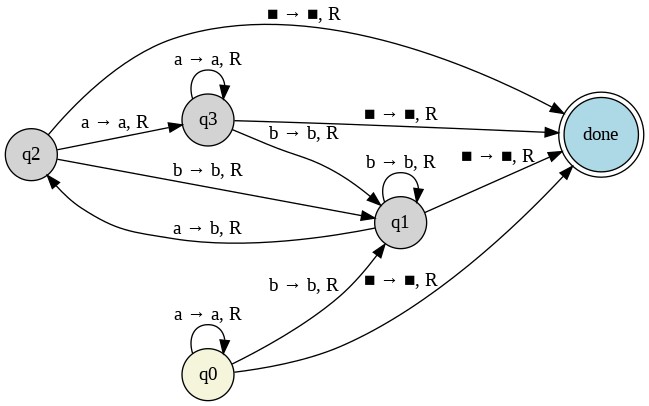

Saída: abba⊔⊔
Configurações: 
 <q0>abaa
 a<q0>baa
 ab<q1>aa
 abb<q2>a
 abba<q3>⊔
 abba⊔<done>⊔


In [8]:
# @title {vertical-output: true }
cadeia1 = "abaa" # @param {type:"string"}
from automata.tm.dtm import DTM

dtm1 = DTM(
    states={'q0', 'q1', 'q2', 'q3', 'done'},
    input_symbols={'a', 'b'},
    tape_symbols={'a', 'b', '.'},
    transitions={
        'q0': {
            'a': ('q0', 'a', 'R'),
            'b': ('q1', 'b', 'R'),
            '.': ('done', '.', 'R')
         },
        'q1': {
            'a': ('q2', 'b', 'R'),
            'b': ('q1', 'b', 'R'),
            '.': ('done', '.', 'R')
        },
        'q2': {
            'a': ('q3', 'a', 'R'),
            'b': ('q1', 'b', 'R'),
            '.': ('done', '.', 'R')
        },
        'q3': {
            'a': ('q3', 'a', 'R'),
            'b': ('q1', 'b', 'R'),
            '.': ('done', '.', 'R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'done'}
)

drawgv_TM(dtm1, name="dtm1")


if (all(n in dtm1.input_symbols for n in cadeia1)):
  gen1 = dtm1.read_input_stepwise(cadeia1)
  _,output1, configurations1 = dtm_configurations(gen1)
  print(f"Saída: {output1}")
  print("Configurações: ")
  for c in configurations1:
    print(f" {c}")
else:
  print("Cadeia inválida")

In [9]:
# @title Testes Automáticos
import unittest
from automata.tm.dtm import DTM
from parameterized import parameterized

class Test_dtm1 (unittest.TestCase):
    @parameterized.expand([
        ['00','ab','ab',True],
        ['01','abaaa','abbaa',True],
        ['02','','',True],
        ['03','bbbbb','bbbbb',True],
        ['04','baabbabb','bbabbbbb',True],
        ['05','b','b',True],
        ['06','a','a',True],
        ['06','aaaaa','aaaaa',True],
        ['07','baaaaa','bbaaaa',True],
        ['08', 'aaaaba', 'aaaabb', True]
    ])

    def test_base (self, name, str, expected_output, expected_result):
        gen = dtm1.read_input_stepwise(str)
        state,output,_ = dtm_configurations(gen)
        self.assertEqual(output.strip(chr(0x2294)),expected_output)
        self.assertTrue(state in dtm1.final_states)

    def test_instance (self):
        self.assertTrue(isinstance(dtm1,DTM))
        self.assertSetEqual(dtm1.input_symbols,{'a','b'})
        self.assertEqual(dtm1.blank_symbol,'.')
        self.assertTrue(len(dtm1.final_states)==1)

# call your test
unittest.main(argv=[''], defaultTest='Test_dtm1', verbosity=2, exit=False)

test_base_0_00 (__main__.Test_dtm1.test_base_0_00) ... ok
test_base_1_01 (__main__.Test_dtm1.test_base_1_01) ... ok
test_base_2_02 (__main__.Test_dtm1.test_base_2_02) ... ok
test_base_3_03 (__main__.Test_dtm1.test_base_3_03) ... ok
test_base_4_04 (__main__.Test_dtm1.test_base_4_04) ... ok
test_base_5_05 (__main__.Test_dtm1.test_base_5_05) ... ok
test_base_6_06 (__main__.Test_dtm1.test_base_6_06) ... ok
test_base_7_06 (__main__.Test_dtm1.test_base_7_06) ... ok
test_base_8_07 (__main__.Test_dtm1.test_base_8_07) ... ok
test_base_9_08 (__main__.Test_dtm1.test_base_9_08) ... ok
test_instance (__main__.Test_dtm1.test_instance) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.022s

OK


## (02)

Construa uma Máquina de Turing Determinística (DTM) que reconhece a linguagem $L = \{a^ib^ic^k \mid i,k \geq 1 \}$.

> Dica: Veja a máquina para a linguagem $L = \{0^n1^n \mid n \ge 0 \}$ apresentada nas notas de aula.

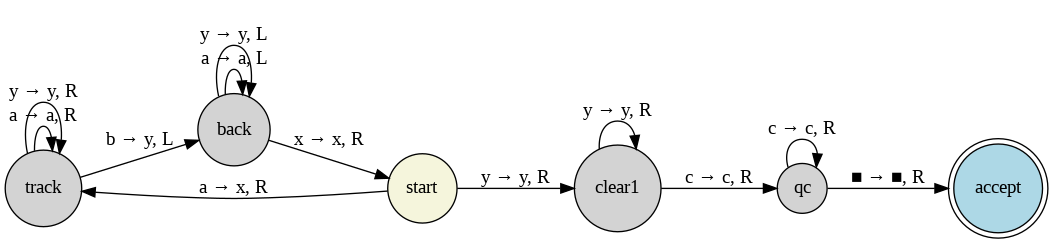

Cadeia não aceita
Saída: bbccc
Configurações: 
 <start>bbccc


In [18]:
# @title {vertical-output: true }
cadeia2 = "bbccc" # @param {type:"string"}
from automata.tm.dtm import DTM,TMConfiguration,TMTape
dtm2 = DTM(
    states={'start', 'track', 'back', 'clear1', 'qc','accept'},
    input_symbols={'a', 'b', 'c'},
    tape_symbols={'a', 'b', 'c', 'x', 'y', '.'},
    transitions={
        'start': {
            'a': ('track', 'x', 'R'),
            'y': ('clear1', 'y', 'R')
        },
        'track': {
            'a': ('track', 'a', 'R'),
            'b': ('back', 'y', 'L'),
            'y': ('track', 'y', 'R')
        },
        'back': {
            'a': ('back', 'a', 'L'),
            'x': ('start', 'x', 'R'),
            'y': ('back', 'y', 'L')
        },
        'clear1': {
            'y': ('clear1', 'y', 'R'),
            'c': ('qc', 'c', 'R')
        },
        'qc': {
            'c': ('qc', 'c', 'R'),
            '.': ('accept', '.', 'R')
        }
    },
    initial_state='start',
    blank_symbol='.',
    final_states={'accept'}
)

drawgv_TM(dtm2, name='dtm2')

if (all(n in dtm2.input_symbols for n in cadeia2)):
  gen2 = dtm2.read_input_stepwise(cadeia2)
  state2 ,output2, configurations2 = dtm_configurations(gen2)
  if state2 == 'accept':
    print("Cadeia aceita")
  else:
    print("Cadeia não aceita")
  print(f"Saída: {output2}")
  print("Configurações: ")
  for c in configurations2:
    print(f" {c}")
else:
  print("Cadeia inválida")

In [19]:
# @title Testes Automáticos
import unittest
from automata.tm.dtm import DTM
from parameterized import parameterized

class Test_dtm2 (unittest.TestCase):
    @parameterized.expand([
        ['aabbcc',True],
        ['aabbc',True],
        ['abc',True],
        ['aaabbbccccc',True],
        ['aaaabbbbc',True],
        ['abcccccccc',True],
        ['aabbbc',False],
        ['aabccc',False],
        ['aabb',False],
        ['ac',False],
        ['bbccc',False],
        ['',False],
        ['ccc', False],
    ])

    def test_base (self, str, expected_result):
        gen = dtm2.read_input_stepwise(str)
        state,_,_ = dtm_configurations(gen)
        self.assertEqual(state in dtm2.final_states, expected_result, str)

    def test_instance (self):
        self.assertTrue(isinstance(dtm2,DTM))
        self.assertSetEqual(dtm2.input_symbols,{'a','b','c'})
        self.assertEqual(dtm2.blank_symbol,'.')
        self.assertTrue(len(dtm2.final_states)==1)

# call your test
unittest.main(argv=[''], defaultTest='Test_dtm2', verbosity=2, exit=False)

test_base_00_aabbcc (__main__.Test_dtm2.test_base_00_aabbcc) ... ok
test_base_01_aabbc (__main__.Test_dtm2.test_base_01_aabbc) ... ok
test_base_02_abc (__main__.Test_dtm2.test_base_02_abc) ... ok
test_base_03_aaabbbccccc (__main__.Test_dtm2.test_base_03_aaabbbccccc) ... ok
test_base_04_aaaabbbbc (__main__.Test_dtm2.test_base_04_aaaabbbbc) ... ok
test_base_05_abcccccccc (__main__.Test_dtm2.test_base_05_abcccccccc) ... ok
test_base_06_aabbbc (__main__.Test_dtm2.test_base_06_aabbbc) ... ok
test_base_07_aabccc (__main__.Test_dtm2.test_base_07_aabccc) ... ok
test_base_08_aabb (__main__.Test_dtm2.test_base_08_aabb) ... ok
test_base_09_ac (__main__.Test_dtm2.test_base_09_ac) ... ok
test_base_10_bbccc (__main__.Test_dtm2.test_base_10_bbccc) ... ok
test_base_11_ (__main__.Test_dtm2.test_base_11_) ... ok
test_base_12_ccc (__main__.Test_dtm2.test_base_12_ccc) ... ok
test_instance (__main__.Test_dtm2.test_instance) ... ok

----------------------------------------------------------------------
Ran 

## (03)

Considere a mesma linguagem da questão 02. Construa uma Máquina Multifita (MNTM) com duas fitas que reconhece a linguagem.

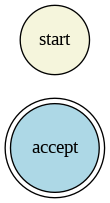

Configurações: 
  Fita 1: <start>aabbcc  Fita 2: <start>⊔


In [ ]:
# @title {vertical-output: true }
cadeia3 = "aabbcc" # @param {type:"string"}
from automata.tm.mntm import MNTM
mntm3 = MNTM(
    states={'start', 'accept'},
    input_symbols={'a', 'b', 'c'},
    tape_symbols={'a', 'b', 'c', '.'},
    n_tapes=2,
    transitions={
      'start': {
      },
    },
    initial_state='start',
    blank_symbol='.',
    final_states={'accept'}
)

drawgv_MNTM(mntm3, name='mntm3')

if (all(n in mntm3.input_symbols for n in cadeia3)):
  gen3 = mntm3.read_input_stepwise(cadeia3)
  conf = mntm_configurations(gen3)
  print("Configurações: ")
  for c in conf:
    print(c)
else:
  print("Cadeia inválida")

In [ ]:
# @title Testes Automáticos
import unittest
from automata.tm.mntm import MNTM
from parameterized import parameterized
from automata.base.exceptions import RejectionException

class Test_mntm2 (unittest.TestCase):
    @parameterized.expand([
        ['aabbcc'],
        ['aabbc'],
        ['abc'],
        ['aaabbbccccc'],
        ['aaaabbbbc'],
        ['abcccccccc'],
    ])
    def test_base_accept (self, str):
        gen = mntm3.read_input_stepwise(str)
        output_conf = list(list(gen)[-1])
        state = output_conf[0].state
        self.assertTrue(state in mntm3.final_states)

    @parameterized.expand([
        ['aabbbc'],
        ['aabccc'],
        ['aabb'],
        ['ac'],
        ['bbccc'],
        [''],
        ['ccc']
    ])
    def test_base_reject (self, str):
        gen = mntm3.read_input_stepwise(str)
        with self.assertRaises(RejectionException):
           lista = [c for c in gen]

    def test_instance (self):
        self.assertTrue(isinstance(mntm3,MNTM))
        self.assertSetEqual(mntm3.input_symbols,{'a','b', 'c'})
        self.assertEqual(mntm3.blank_symbol,'.')
        self.assertTrue(len(mntm3.final_states)==1)

# call your test
unittest.main(argv=[''], defaultTest='Test_mntm2', verbosity=2, exit=False)

test_base_accept_0_aabbcc (__main__.Test_mntm2.test_base_accept_0_aabbcc) ... ERROR
test_base_accept_1_aabbc (__main__.Test_mntm2.test_base_accept_1_aabbc) ... ERROR
test_base_accept_2_abc (__main__.Test_mntm2.test_base_accept_2_abc) ... ERROR
test_base_accept_3_aaabbbccccc (__main__.Test_mntm2.test_base_accept_3_aaabbbccccc) ... ERROR
test_base_accept_4_aaaabbbbc (__main__.Test_mntm2.test_base_accept_4_aaaabbbbc) ... ERROR
test_base_accept_5_abcccccccc (__main__.Test_mntm2.test_base_accept_5_abcccccccc) ... ERROR
test_base_reject_0_aabbbc (__main__.Test_mntm2.test_base_reject_0_aabbbc) ... ok
test_base_reject_1_aabccc (__main__.Test_mntm2.test_base_reject_1_aabccc) ... ok
test_base_reject_2_aabb (__main__.Test_mntm2.test_base_reject_2_aabb) ... ok
test_base_reject_3_ac (__main__.Test_mntm2.test_base_reject_3_ac) ... ok
test_base_reject_4_bbccc (__main__.Test_mntm2.test_base_reject_4_bbccc) ... ok
test_base_reject_5_ (__main__.Test_mntm2.test_base_reject_5_) ... ok
test_base_reject_6_c